In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
dataset_path = '/content/drive/MyDrive/flower_data'

In [ ]:
batch_size = 32
img_height, img_width = 224, 224
num_classes = 2
epochs = 10

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


Found 6560 images belonging to 1 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1639 images belonging to 1 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)



Epoch 1/10
205/205 [==============================] - 269s 1s/step - loss: 53615308.0000 - accuracy: 0.5110 - val_loss: 233870128.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
205/205 [==============================] - 155s 756ms/step - loss: 4854237696.0000 - accuracy: 0.5043 - val_loss: 725768128.0000 - val_accuracy: 1.0000
Epoch 3/10
205/205 [==============================] - 162s 790ms/step - loss: 57412251648.0000 - accuracy: 0.4976 - val_loss: 29694756864.0000 - val_accuracy: 1.0000
Epoch 4/10
205/205 [==============================] - 152s 743ms/step - loss: 195551772672.0000 - accuracy: 0.5050 - val_loss: 428750569472.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
205/205 [==============================] - 162s 789ms/step - loss: 454122405888.0000 - accuracy: 0.4998 - val_loss: 162431991808.0000 - val_accuracy: 1.0000
Epoch 6/10
205/205 [==============================] - 149s 727ms/step - loss: 1416798535680.0000 - accuracy: 0.4973 - val_loss: 3426218147840.0000 - val_accuracy: 0.0000

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(1, epochs + 1)

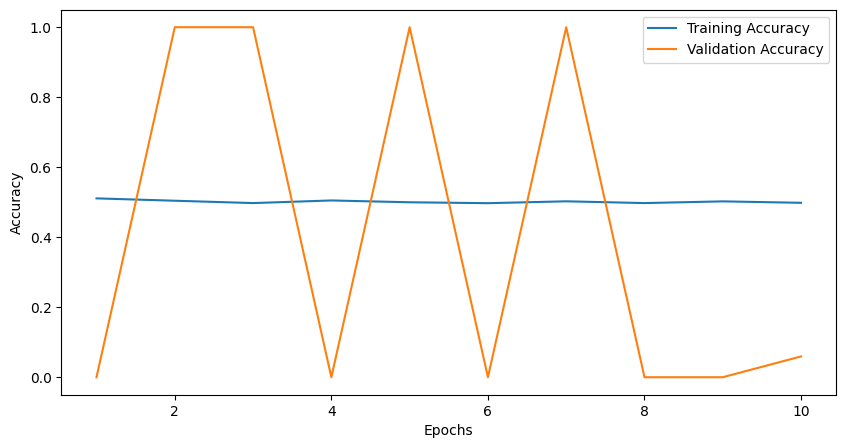

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
